Open and explore metadata from:
    https://figshare.com/articles/1000homes/1270900

In [1]:
import sys, os
os.chdir('data')
fname = 'homes_mapping_file.txt'

In [2]:
with open(fname) as f:
    lines = f.readlines()

In [3]:
lines

['ID\tCity\tState\tLatitude\tLongitude\tMeanAnnual Temperature\tMeanAnnualPrecipitation\tNetPrimaryProductivity\tElevation\tResidence\tNumberBedroooms\r12\tHopkinton\tNH\t43.2\t-71.7\t6.960091743\t87.59441896\t2.144495766\t222.6697235\tA mobile home\t3\r13\tAlbuquerque\tNM\t35.1\t-106.5\t10.76146789\t26.16360856\t0.621555117\t1708.676392\tOne-family house detached from any other house\t3\r14\tSavannah\tGA\t32.1\t-81.1\t19.11391437\t102.441208\t2.431253787\t11.96749973\tOne-family house detached from any other house\t2\r15\tRenton\tWA\t47.4\t-122.1\t11.17285933\t85.4941896\t2.186705014\t144.7330322\tOne-family house detached from any other house\t4\r16\tFort Plain\tNY\t42.9\t-74.7\t6.766437309\t88.5733945\t2.183676564\t429.188324\tOne-family house detached from any other house\t3\r17\tOuray\tCO\t38.0\t-107.7\t3.639831804\t37.23990826\t0.998599335\t2571.946045\tOne-family house detached from any other house\t2\r18\tMason City\tIA\t43.1\t-93.2\t7.587155963\t63.1601682\t0.823516054\t367.77

In [4]:
import csv
import pandas as pd

with open(fname,'r') as f:
    df = pd.read_csv(f,sep='\t')
df.head()

,ID,City,State,Latitude,Longitude,MeanAnnual Temperature,MeanAnnualPrecipitation,NetPrimaryProductivity,Elevation,Residence,NumberBedroooms
0,12,Hopkinton,NH,43.2,-71.7,6.960092,87.594419,2.144496,222.669723,A mobile home,3
1,13,Albuquerque,NM,35.1,-106.5,10.761468,26.163609,0.621555,1708.676392,One-family house detached from any other house,3
2,14,Savannah,GA,32.1,-81.1,19.113914,102.441208,2.431254,11.967500,One-family house detached from any other house,2
3,15,Renton,WA,47.4,-122.1,11.172859,85.494190,2.186705,144.733032,One-family house detached from any other house,4
4,16,Fort Plain,NY,42.9,-74.7,6.766437,88.573394,2.183677,429.188324,One-family house detached from any other house,3


In [5]:
print len(df.index)

1584


Metadata exploration

In [6]:
import seaborn as sns
%matplotlib inline

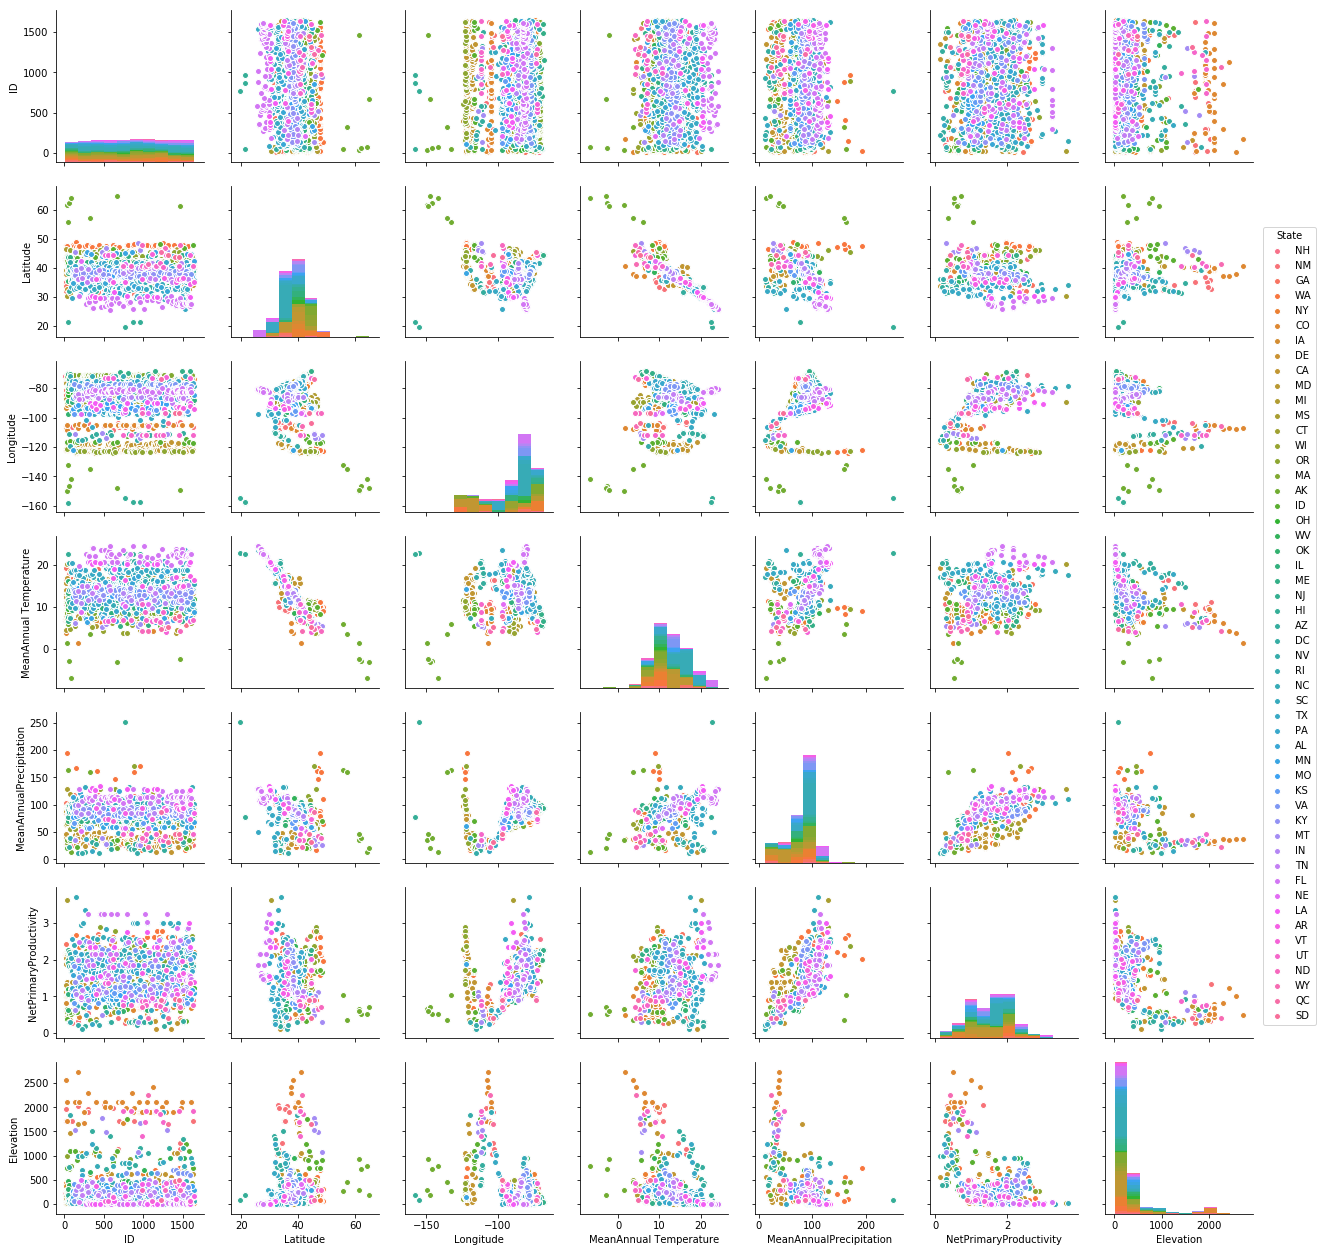

In [7]:
sns.pairplot(df, hue='State', size=2.5);

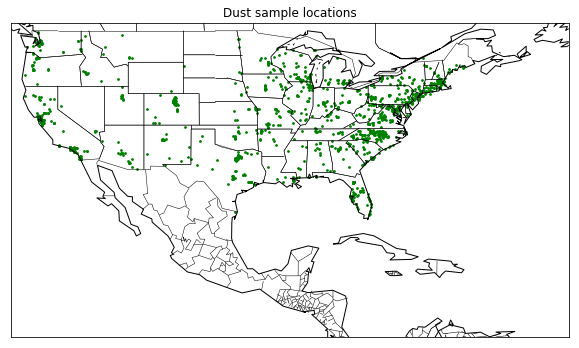

In [12]:
# equidistant cylindrical projection: simplest, displays the world in latitude and longitudinal 
# coordinates

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.

#  long lat (-124.848974, 24.396308) - (-66.885444, 49.384358)
#m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
#            llcrnrlon=-180,urcrnrlon=180,resolution='c')
fig = plt.figure(figsize=(10,10))
m = Basemap(projection='cyl',llcrnrlat=10,urcrnrlat=50,\
            llcrnrlon=-126,urcrnrlon=-55)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# add in locations where samples were taken
lons = df['Longitude']
lats = df['Latitude']
x, y = m(lons,lats)
m.scatter(x,y,3,marker='o',color='g')
plt.title("Dust sample locations")
plt.show()